In [2]:
import torch
import cv2
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Dataset

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
def get_data_loaders(path, batch_size, valid_batch_size=0):

    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

    tbs = len(train_dataset) if batch_size == 0 else batch_size
    train_loader = DataLoader(train_dataset, batch_size=tbs, shuffle=True)

    valid_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    vbs = len(valid_dataset) if valid_batch_size == 0 else valid_batch_size
    valid_loader = DataLoader(valid_dataset, batch_size=vbs, shuffle=True)

    return train_loader, valid_loader

In [5]:
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.relu1 = nn.ReLU(True)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.relu2 = nn.ReLU(True)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4, dilation=2)
        self.relu3 = nn.ReLU(True)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=4, dilation=2)
        self.relu4 = nn.ReLU(True)
        self.conv5 = nn.Conv2d(256, 128, kernel_size=5, stride=1, padding=4, dilation=2)
        self.relu5 = nn.ReLU(True)
        self.conv6 = nn.Conv2d(128, 3, kernel_size=5, stride=1, padding=4, dilation=2)
        self.relu6 = nn.ReLU(True)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.relu(self.conv4(x))
        x = nn.functional.relu(self.conv5(x))
        x = torch.sigmoid(self.conv6(x))
        return x

In [6]:
model = ColorizationNet().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)

In [7]:
data_path = "~/data"

train_batch_size = 128
valid_batch_size = 5000
train_loader, valid_loader = get_data_loaders(
    data_path, train_batch_size, valid_batch_size
)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
# Training loop
EPOCHS = 5
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        # Forward pass
        outputs = model(grayscale_images)
        loss = criterion(outputs, images)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

        plt

        

print("Finished Training")

Output shape: torch.Size([128, 3, 32, 32])
Epoch [1/5], Step [1/391], Loss: 0.0653
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: torch.Size([128, 3, 32, 32])
Output shape: 

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # Convert from Tensor image and display
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    if len(img.shape) == 2:  # grayscale image
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Display grayscale, colorized, and original images side by side.
    n: number of images to display from the batch
    """
    fig = plt.figure(figsize=(3*n, 4))
    for i in range(n):
        # Display original image
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        # Display original grayscale image
        ax = plt.subplot(1, 3*n, 3*i + 2)
        imshow(grayscale_images[i])
        ax.set_title("Grayscale")
        ax.axis("off")

        # Display colorized image
        ax = plt.subplot(1, 3*n, 3*i + 3)
        imshow(colorized_images[i])
        ax.set_title("Colorized")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

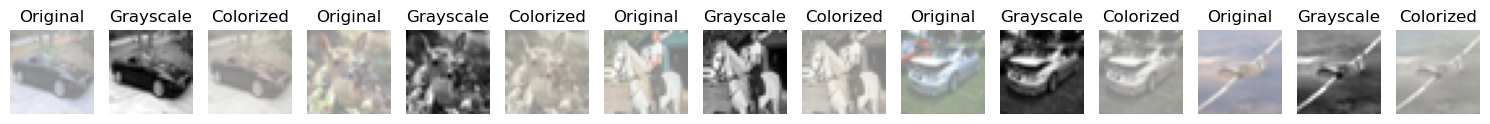

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.88 GiB. GPU 0 has a total capacity of 15.89 GiB of which 4.06 GiB is free. Process 3468737 has 324.00 MiB memory in use. Process 3476447 has 1.21 GiB memory in use. Including non-PyTorch memory, this process has 10.30 GiB memory in use. Of the allocated memory 7.43 GiB is allocated by PyTorch, and 2.58 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [10]:
with torch.no_grad():
    for i, (images, _) in enumerate(valid_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        colorized_images = model(grayscale_images)

        # Convert the tensors back to CPU for visualization
        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)  # remove the color channel
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        #colorized_images_cpu=scale_predicted_colors(colorized_images_cpu)
        
        #colorized_images_cpu=exaggerate_colors(colorized_images_cpu)

        # Visualize the grayscale, colorized, and original images
        visualize_all_three(original_images_cpu, grayscale_images_cpu, colorized_images_cpu)

        if i == 10:  # only do this for up to certain batch for demonstration purposes
            break